Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import datetime 
import io

1. Importing the Dataset.
2. Indexing the dateset to date
3. Parsing the date function to read it into the desired format

In [2]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)


Shows the top 5 rows of the data.
dataset.tail() shall show the bottom 5 rows and if any value is entered in the parenthesis then, that number of rows shall be displayed

In [3]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


Checking if any missing data and the type of the data in each column

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


Plotting the 'Open' price of the stock to check the trend over the period

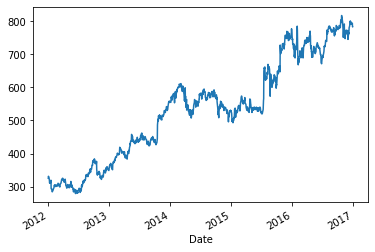

In [5]:
dataset['Open'].plot()

Coverting the 'Close' column into a float by removing the ',' from the data 

In [6]:
dataset['Close'] = dataset['Close'].str.replace(',', '').astype(float)

In [7]:
dataset['Volume'] = dataset['Volume'].str.replace(',', '').astype(float)

This Function takes the Average of the sum of consequent 7 days of the day.Hence the first 6 rows have nan values. 
This is done in order to check that for every single stock prediction we look 7 days back and collect all the transactions that fall in the range

In [8]:
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


Plotting the Close price after rolling it to 1 month of data. Basically gives the moving average of the past 30 days
where figsize gives the width and the height of the graph resp. in inchs

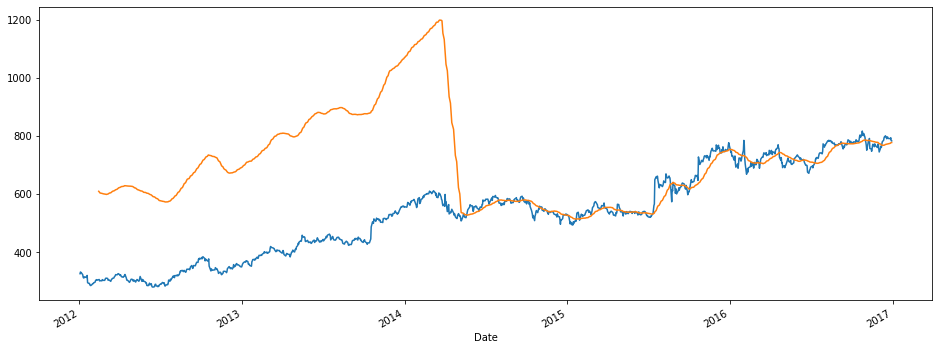

In [9]:
dataset['Open'].plot(figsize = (16,6))
dataset.rolling(window=30).mean()['Close'].plot()

Adding the 'Open' Column of the dataset to the training set

In [10]:
training_set = dataset['Open']
training_set = pd.DataFrame(training_set)


Checking for the null values in the dataset

In [11]:
dataset.isnull().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

Feature Scaling is done to scale down the values in order to get the best results. Min Max Scaler is used in the case when we want to scale the values from 0 to 1.
Basically creates a datastructure with 60 timestamps and 1 output.
This is done in order to take the day from day 1 to day 60 and make predictions on the 61st day.

In [12]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range =(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

creating two lists X_train and Y_train.
Appending the scaled values to X_train, from 2 months using the timestamp. 


In [13]:

X_train = []
Y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train , Y_train =np.array(X_train), np.array(Y_train)

X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

Data is reshaped to give the new shape. 

In [14]:
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

Importing Keras libraries and packages.
Keras is tensorflow's high level API to build a deep learning model.
1. Sequential - Is a linear stack of layers which is used create a seqnetial model by passing the list.
2. Dense - Dense payer is used to change the dimentions of the output values. It does the matrix vetor multiplication
3. LSTM - they are used to store past data. This is required as previous price is required to predict the future price of the stock
4. Dropout - It used to prevent the model from overfitting


In [15]:
#Building RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

As the data is the sequential data, we assign the model to the regressor 

In [16]:

regressor = Sequential()


Trainnig the neural networks



In [17]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))   

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer. As we require only 1 output hence units = 1
regressor.add(Dense(units = 1))



Compiling the Model. 
the type of optimiser used can greatly affect how fast the algorithm converges into the minmum value.
Adam is used as it combines the perks of AdAgrad and RMSprop optimisers.
1. Adagrad uses different learning rate fro every paramater and every step because the infrequent paramters must have larger learning rate and visa versa 
2. RMSprop considers the fixing of diminishing learning rate by using limited number of previous learning rates
3. Adam - computes the adaptive learning rate for each parameter based on its past gradients 

In [18]:

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)


Epoch 1/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0431
Epoch 2/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0058
Epoch 3/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0051
Epoch 4/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0057
Epoch 11/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0042
Epoch 13/100


 Making the predictions and visualising the results

In [30]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True

Iloc is used select rows and columns by number in orderthey appear in the dataframe 

In [31]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [32]:
dataset_test.head()


,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [33]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [34]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [35]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [36]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


We merge the training set and test set in order the predic the stock price on the 0th axis. 
All other steps are taken similar to those taken in the test set.
X test list is assigned to the predicted stock price and inverse transform is done to take the data out of the matrix form.

In [37]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Information of the predicted stock price dataframe.

In [38]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


 Making the predictions and visualising the results
 It concludes that the Predicted stock price increases similar to that od the real stock price and shows that the objective is accomplished.

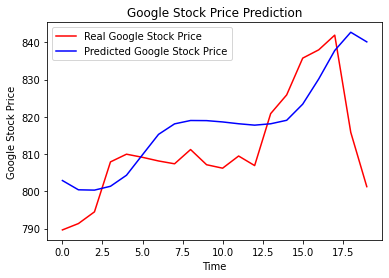

In [39]:


plot.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plot.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plot.title('Google Stock Price Prediction')
plot.xlabel('Time')
plot.ylabel('Google Stock Price')
plot.legend()
plot.show()
